In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
import matplotlib.pyplot as plt

## Making a tree diagram

(0.0, 1.0, 0.0, 1.0)

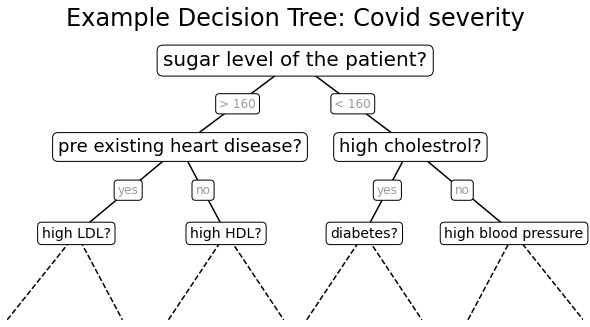

In [3]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree: Covid severity', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "sugar level of the patient?", 20)
text(ax, 0.3, 0.6, "pre existing heart disease?", 18)
text(ax, 0.7, 0.6, "high cholestrol?", 18)
text(ax, 0.12, 0.3, "high LDL?", 14)
text(ax, 0.38, 0.3, "high HDL?", 14)
text(ax, 0.62, 0.3, "diabetes?", 14)
text(ax, 0.88, 0.3, "high blood pressure", 14)

text(ax, 0.4, 0.75, "> 160", 12, alpha=0.4)
text(ax, 0.6, 0.75, "< 160", 12, alpha=0.4)

text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1])

# fig.savefig('figures/05.08-decision-tree.png')

## visualizing a clustered dataset

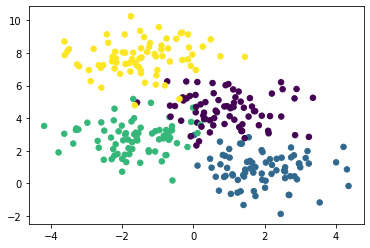

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, zorder=1, cmap='viridis');

## Lets run decision tree classifier on this data

In [5]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact

[(-2.4810712360724163, 10.854055834769046),
 (-4.613339274735419, 4.786447242633593)]

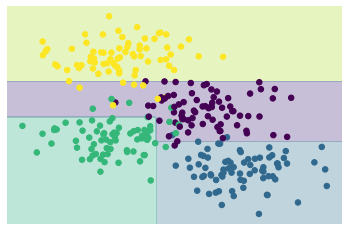

In [10]:
xlim = None
ylim = None
ax = plt.gca()
    
# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
            clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
ax.axis('off')
if xlim is None:
    xlim = ax.get_xlim()
if ylim is None:
    ylim = ax.get_ylim()

# fit the estimator
model.fit(X, y)
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
n_classes = len(np.unique(y))
Z = Z.reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, alpha=0.3,
                        levels=np.arange(n_classes + 1) - 0.5,
                        cmap='viridis',
                        zorder=1)

ax.set(xlim=xlim, ylim=ylim)


## Putting things in helper functions

In [15]:
def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis',
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=(1, 10))


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 100]);

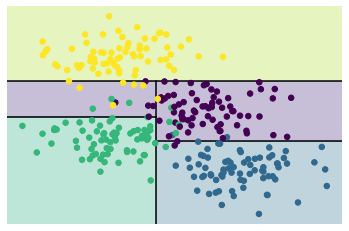

In [16]:
visualize_tree(model, X, y)

## Plotting for multiple depths

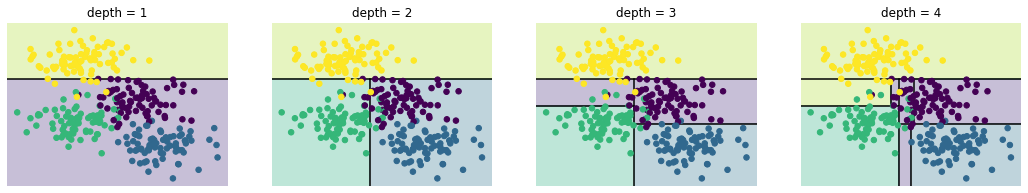

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

# fig.savefig('figures/05.08-decision-tree-levels.png')

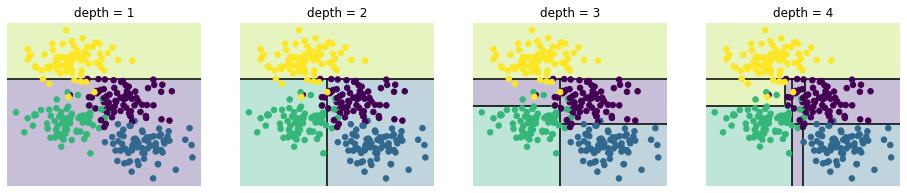

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
# fig.subplots_adjust(left=0.02, right=0.98)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

# fig.savefig('figures/05.08-decision-tree-levels.png')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
        


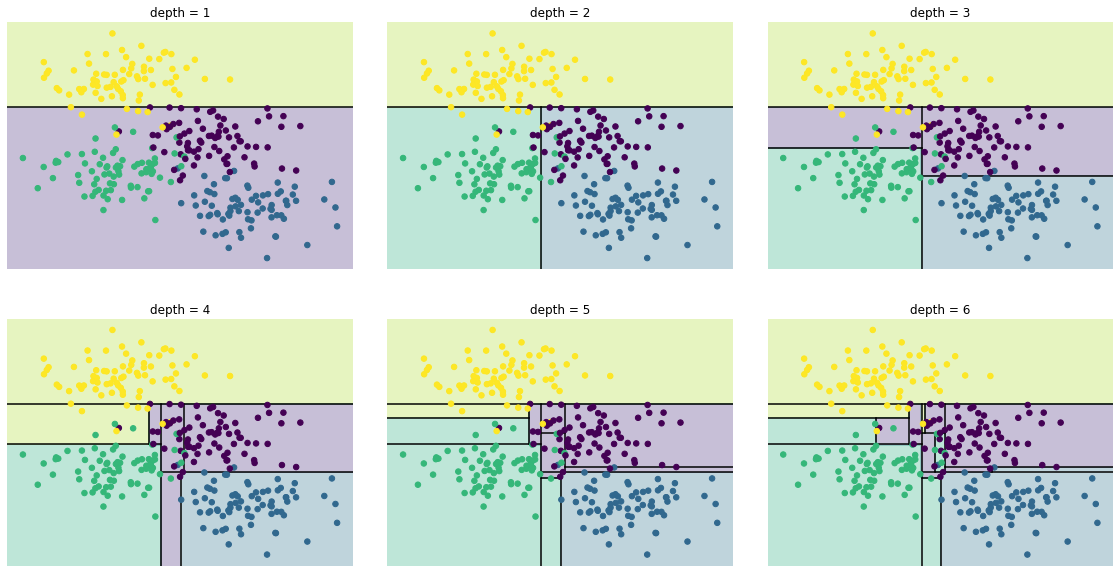

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

for axi, depth in zip(ax.ravel(), range(1, 7)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

## Different boundaries for different data sample

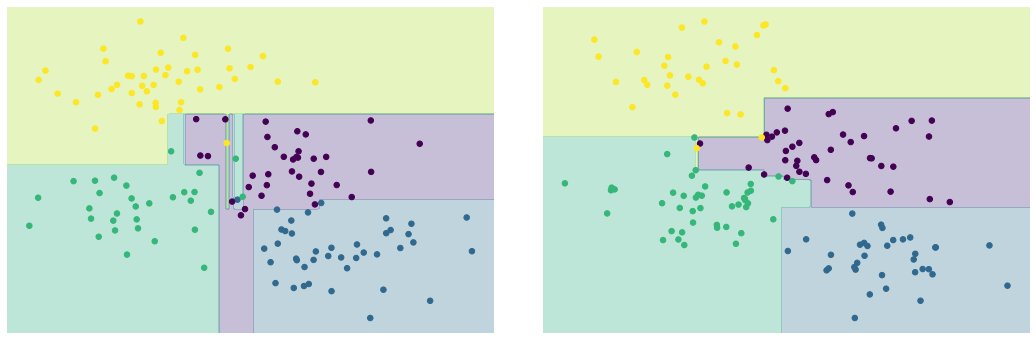

In [ ]:
model = DecisionTreeClassifier(max_depth=10)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])

## Interactive visualization

In [17]:
from ipywidgets import interact

@interact(depth=(1, 10))
def tree_output(depth=5):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    visualize_tree(clf, X, y)

interactive(children=(IntSlider(value=5, description='depth', max=10, min=1), Output()), _dom_classes=('widget…

## Good Starting Models - Random Forest

In [ ]:
from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier
@interact(n_estimators=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
def visualize_bagging(n_estimators=1):
    ax = plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Model Selection

In [32]:
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/4526/34463/train.json.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1621999154&Signature=Hl760lyS2gZ%2B5HmLikeTvbGFaxfkjSKTz8QuOlWrHnwEW6sLO39kSGFm54FOwkXT6YoPSKxYY08aFekAF9sRnHdF7M%2F1qlikXl17eRr4CfTmugTIEHADQNApqX%2FbeBma6TjsCNWWwavDcmMF0M5GyDBLJMPt%2BI7oT%2BWuoBRoM0lX9TFf7adVY8aECGmHxenSLW0lP8kj4XB%2B6iaOWPu9DpuzhZg5hqzwlswmu2%2FtQTEMwh0HMXqCxH6SBpGIWo6BX7VKy8s%2BDD4am8tZ1fkwR9lXL82SmftAZQnUnfvdZ0l6lFqi3TuPslG%2FZqEkuGFnMoJZFg6x0ViMvm1RIBvckw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.json.zip" -c -O 'train.json.zip'

--2021-05-23 03:19:23--  https://storage.googleapis.com/kagglesdsdata/competitions/4526/34463/train.json.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1621999154&Signature=Hl760lyS2gZ%2B5HmLikeTvbGFaxfkjSKTz8QuOlWrHnwEW6sLO39kSGFm54FOwkXT6YoPSKxYY08aFekAF9sRnHdF7M%2F1qlikXl17eRr4CfTmugTIEHADQNApqX%2FbeBma6TjsCNWWwavDcmMF0M5GyDBLJMPt%2BI7oT%2BWuoBRoM0lX9TFf7adVY8aECGmHxenSLW0lP8kj4XB%2B6iaOWPu9DpuzhZg5hqzwlswmu2%2FtQTEMwh0HMXqCxH6SBpGIWo6BX7VKy8s%2BDD4am8tZ1fkwR9lXL82SmftAZQnUnfvdZ0l6lFqi3TuPslG%2FZqEkuGFnMoJZFg6x0ViMvm1RIBvckw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.json.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1845320 (1.8M) [application/zip]
Saving to: ‘train.json.zip’

train.json.zip      100%[=============

In [33]:
! unzip train.json.zip

Archive:  train.json.zip
  inflating: train.json              
   creating: __MACOSX/
  inflating: __MACOSX/._train.json   


In [34]:
import pandas as pd
df = pd.read_json('train.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)
y_train = pd.Series(y_train)
y_validation = pd.Series(y_validation)


In [36]:
((y_train.value_counts() / len(y_train))[:4]).T

0    0.262500
2    0.250000
3    0.245833
1    0.241667
dtype: float64

In [37]:
((y_validation.value_counts() / len(y_validation))[:4]).T

1    0.283333
3    0.266667
2    0.250000
0    0.200000
dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, stratify=y)


## Hyperparameter Tuning

In [18]:
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target'] = df['target'].apply(lambda x: iris.target_names[x])

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier()
params = { 
    'n_estimators': [5, 10, 20, 40, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf = GridSearchCV(estimator, params, cv= 5, return_train_score=False)
clf.fit(iris.data, iris.target)

CPU times: user 1min 6s, sys: 495 ms, total: 1min 7s
Wall time: 1min 7s


In [21]:
import pandas as pd
gs_results = pd.DataFrame(clf.cv_results_)
gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007344,0.000664,0.001951,0.001615,gini,4,auto,5,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,47
1,0.013961,0.001734,0.001567,0.000188,gini,4,auto,10,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.933333,0.966667,0.900000,0.966667,1.0,0.953333,0.033993,111
2,0.027330,0.002655,0.002437,0.000454,gini,4,auto,20,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
3,0.049338,0.001500,0.003578,0.000065,gini,4,auto,40,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
4,0.126157,0.005085,0.009061,0.002522,gini,4,auto,100,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.966667,0.966667,0.933333,0.900000,1.0,0.953333,0.033993,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.013156,0.000221,0.001403,0.000016,entropy,8,log2,10,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.966667,0.966667,0.900000,0.900000,1.0,0.946667,0.040000,155
176,0.026477,0.001747,0.002160,0.000033,entropy,8,log2,20,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.966667,0.966667,0.900000,0.866667,1.0,0.940000,0.048990,174
177,0.052966,0.004527,0.003773,0.000221,entropy,8,log2,40,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,58
178,0.127725,0.001960,0.008031,0.000151,entropy,8,log2,100,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,58


In [22]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 20}

In [24]:
clf.best_score_

0.9666666666666668

In [25]:
%time
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator, params, 
                        cv=5, return_train_score=False, 
                        n_iter=10)
rs.fit(iris.data, iris.target)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [26]:
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056906,0.007863,0.004739,0.001946,40,sqrt,4,entropy,"{'n_estimators': 40, 'max_features': 'sqrt', '...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
1,0.026117,0.002076,0.002198,0.000120,20,auto,4,gini,"{'n_estimators': 20, 'max_features': 'auto', '...",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,4
2,0.145395,0.036622,0.008067,0.000279,100,auto,8,gini,"{'n_estimators': 100, 'max_features': 'auto', ...",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,4
3,0.025974,0.001720,0.002231,0.000185,20,sqrt,5,entropy,"{'n_estimators': 20, 'max_features': 'sqrt', '...",0.966667,0.966667,0.900000,0.933333,1.0,0.953333,0.033993,8
4,0.006781,0.000197,0.001149,0.000265,5,auto,6,entropy,"{'n_estimators': 5, 'max_features': 'auto', 'm...",0.966667,0.966667,0.933333,0.900000,1.0,0.953333,0.033993,8
5,0.128467,0.006423,0.008120,0.000410,100,log2,6,gini,"{'n_estimators': 100, 'max_features': 'log2', ...",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,4
6,0.026620,0.001644,0.002164,0.000037,20,auto,4,entropy,"{'n_estimators': 20, 'max_features': 'auto', '...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
7,0.130117,0.005211,0.007943,0.000057,100,log2,4,entropy,"{'n_estimators': 100, 'max_features': 'log2', ...",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,4
8,0.007054,0.000150,0.001050,0.000030,5,sqrt,4,entropy,"{'n_estimators': 5, 'max_features': 'sqrt', 'm...",0.966667,0.966667,0.900000,0.933333,1.0,0.953333,0.033993,8
9,0.006903,0.000191,0.001103,0.000188,5,log2,5,entropy,"{'n_estimators': 5, 'max_features': 'log2', 'm...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,3


In [27]:
rs.best_score_

0.9666666666666668

In [28]:
rs.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [29]:
rs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Automating Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 10, 20]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 15]
        }
    }
}
all_scores = {'model_name': [], 'best_score': [], 'best_params': []}
for model_name, model_data in params.items():
  clf = GridSearchCV(model_data['model'], model_data['params'], cv=5, return_train_score=False)
  clf.fit(iris.data, iris.target)
  all_scores['model_name'].append(model_name)
  all_scores['best_score'].append(clf.best_score_)
  all_scores['best_params'].append(clf.best_params_)

In [ ]:
import pandas as pd
pd.DataFrame(all_scores)

,model_name,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 20}
2,logistic_regression,0.966667,{'C': 5}
